# Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url

    a. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
8. Read student data into a list of Students from a csv file:

    a. loop through the list and print each student with name, img_url and avg_grade.

    b. sort the list by avg_grade
    
    c. create a bar chart with student_name on x and avg_grade on y-axis
9. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
10. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

In [48]:
class Student:


    def __init__(self, id, name, gender, data_sheet, image_url):
        self.id = id
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url

    def get_avg_grade(self):
        return sum(self.data_sheet.get_grades_as_list())/len(self.data_sheet.get_grades_as_list())

    def get_progression_ects(self):
        ects = 0
        for course in self.data_sheet.courses:
            if course.grade != None and course.grade > 0:
                ects += course.ects

        return (ects / 150) * 100



class DataSheet:

    def __init__(self, courses):
        self.courses = courses


    def get_grades_as_list(self):
        return list(filter(None, [course.grade for course in self.courses]))

class Course:

    def __init__(self, name, classroom, teacher, ects, grade=None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ects = ects
        self.grade = grade





In [42]:
import random as rnd
import csv

def generate_students(number_of_students):
    names = ['Per', 'Kurt', 'Signe', 'Boerge', 'Irene']
    genders = ['female', 'male']
    coursenames = ['Python', 'Security', 'AP']
    grades = [-3, 0, 2, 4, 7, 10, 12, None]

    students = []
    for number in range(number_of_students):
        courses = []
        for coursename in coursenames:
            courses.append(Course(coursename, 'CL103', "Kurt", 10, rnd.choice(grades)))

        datasheet = DataSheet(courses)
        students.append(Student(number, rnd.choice(names), rnd.choice(genders), datasheet, 'URL'))

    columns = ['id', 'stud_name', 'gender', 'course_name', 'teacher', 'ects', 'classroom', 'grade', 'img_url']
    with open('students.csv', 'w') as studentsfile:
        writer = csv.DictWriter(studentsfile, columns, quoting=csv.QUOTE_NONNUMERIC)
        writer.writeheader()
        for student in students:
            for course in student.data_sheet.courses:
                writer.writerow({
                    'id' : student.id,
                    'stud_name' : student.name,
                    'gender' : student.gender,
                    'course_name' : course.name,
                    'teacher' : course.teacher,
                    'ects' : course.ects,
                    'classroom' : course.classroom,
                    'grade' : course.grade,
                    'img_url' : student.image_url
                })

generate_students(5)


In [49]:
students_from_csv = {}
with open('students.csv', 'r') as studentsfile:
    read = csv.DictReader(studentsfile)
    for row in read:
        if row['id'] not in students_from_csv:
            students_from_csv[row['id']] = Student(row['id'], 
                                                row['stud_name'], 
                                                row['gender'],  
                                                DataSheet([Course(row['course_name'], 
                                                            row['classroom'], 
                                                            row['teacher'],
                                                            int(row['ects']),
                                                            int(row['grade']) if row['grade'] != '' else None)]),
                                                row['img_url'])
        else:
            students_from_csv[row['id']].data_sheet.courses.append(Course(row['course_name'], 
                                                            row['classroom'], 
                                                            row['teacher'],
                                                            int(row['ects']),
                                                            int(row['grade']) if row['grade'] != '' else None))

for student_id in students_from_csv:
    student = students_from_csv[student_id]
    print(student.name, student.image_url, student.get_avg_grade(), student.get_progression_ects())


Irene URL 4.0 6.666666666666667
Boerge URL 2.6666666666666665 20.0
Kurt URL -0.6666666666666666 6.666666666666667
Signe URL 5.333333333333333 13.333333333333334
Signe URL 0.5 6.666666666666667


<BarContainer object of 5 artists>

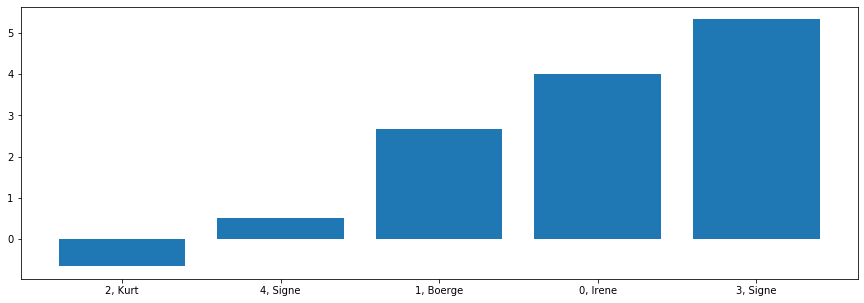

In [50]:
import matplotlib.pyplot as plt

students_avg = {}
for student in students_from_csv:
    students_avg[student] = students_from_csv[student].get_avg_grade()

students_avg = {k: v for k, v in sorted(students_avg.items(), key=lambda item: item[1])}

y_bar = []
for key in students_avg.keys():
    y_bar.append('{}, {}'.format(key, students_from_csv[key].name))

x_bar = students_avg.values()

plt.figure(figsize=(15,5))

plt.bar(y_bar, x_bar, align='center')

In [57]:
class NotEnoughStudentsException(ValueError):
    def __init__(self, *args, **kwargs):
        ValueError.__init__(self, *args, **kwargs)

def highest_ects_percentage():
    progress = {}
    for student in students_from_csv:
        progress[student] = students_from_csv[student].get_progression_ects()

    highest_students = sorted(progress, key=progress.get, reverse=True) [:3]

    if len(highest_students) < 3:
        raise NotEnoughStudentsException('Less than 3 students ')
    else:
        return highest_students

highest_ects_percentage()

['1', '3', '0']